In [32]:
import os
import numpy as np
from natsort import natsorted
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras import models
import keras
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.utils import to_categorical 

28x28 Grauwertpixel im Wertebereich von 0 bis 255
Anzahl Klassen = Anzahl Neuronen

## Get Images

Speichert jedes Bild als Graustufenbild der Größe 250x250 Pixel als array in einem array

In [33]:
def get_images(images_path):

    tensor_images = []

    train_or_test_folder = os.listdir(images_path)

    for folder in natsorted(train_or_test_folder):
        single_folder = os.path.join(images_path, folder)

        for file in os.listdir(single_folder):

            # get images as tensors
            filepath = os.path.join(single_folder, file)

            if filepath.lower().endswith(('.jpeg', '.jpg')):
                image = tf.io.read_file(filepath)
                tensor_image = tf.io.decode_image(image, channels=1, dtype=tf.dtypes.float32)
                tensor_image = tf.image.resize(tensor_image, [250, 250])
                tensor_images.append(tensor_image)
    
    return tensor_images


train_path_images = '../02_data_crop/train'
train_images = get_images(train_path_images)

test_path_images = '../02_data_crop//test'
test_images = get_images(test_path_images)

train_images
test_images

## Get Labels

Speichert für jedes Bild den Namen des jeweiligen Unterordners als Integer Eintrag in einem Array

In [34]:
def get_label(images_path):

    tensor_label = []

    for folder in natsorted(os.listdir(images_path)):
        label = int(folder)

        for file in os.listdir(os.path.join(images_path, folder)):
            tensor_label.append(label)
         
    return tensor_label

train_path_labels = '../02_data_crop/train'
train_labels = get_label(train_path_labels)

test_path_labels = '../02_data_crop//test'
test_labels = get_label(test_path_labels)

train_labels, test_labels

## Create Tensorflow datasets

Speichert images und labels in Variablen als Tensorflow Dataset + Einteilung in Batches

In [40]:
# Create Tensorflow dataset for images and labels, not shuffeld
tf_train_images = tf.data.Dataset.from_tensor_slices(train_images)
#tf_train_images = tf_train_images.batch(10)

tf_train_labels = tf.data.Dataset.from_tensor_slices(train_labels)

In [41]:
# Create Tensorflow dataset for images and labels, not shuffeld
tf_test_images = tf.data.Dataset.from_tensor_slices(test_images)
#tf_test_images = tf_test_images.batch(10)

tf_test_labels = tf.data.Dataset.from_tensor_slices(test_labels)

tf_train_images, tf_train_labels  +    tf_test_images, tf_test_labels

## Check Labels and Images

In [37]:
print(train_labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [38]:
# print shape, empty ()
first_five_elements = tf_train_labels.take(5)
for element in first_five_elements:
    print(element.shape)
    print(element)

()
tf.Tensor(1, shape=(), dtype=int32)
()
tf.Tensor(1, shape=(), dtype=int32)
()
tf.Tensor(1, shape=(), dtype=int32)
()
tf.Tensor(1, shape=(), dtype=int32)
()
tf.Tensor(1, shape=(), dtype=int32)


In [42]:
# Graustufenbilder, da Farbe vermutlich nicht notwendig und verbraucht mehr Ressourcen
first_five_elements = tf_train_images.take(5)
for element in first_five_elements:
    print(element.shape)

(250, 250, 1)
(250, 250, 1)
(250, 250, 1)
(250, 250, 1)
(250, 250, 1)


## Dataset as Numpy Array

In [43]:
# Umwandlung des TensorFlow-Datasets in ein Numpy-Array
train_images = np.array(list(tf_train_images.as_numpy_iterator()))
train_labels = np.array(list(tf_train_labels.as_numpy_iterator()))

In [44]:
test_images = np.array(list(tf_test_images.as_numpy_iterator()))
test_labels = np.array(list(tf_test_labels.as_numpy_iterator()))

In [45]:
print("Shape Trainigsdaten: {}".format(train_images.shape))
print("Dimension Bild Nr. 5: {}".format(train_images[5].shape))
print("Label zu Bild Nr.5: {}".format(train_labels[5]))

Shape Trainigsdaten: (7601, 250, 250, 1)
Dimension Bild Nr. 5: (250, 250, 1)
Label zu Bild Nr.5: 1


In [46]:
print("Shape Testdaten: {}".format(test_images.shape))
print("Dimension Bild Nr. 5: {}".format(test_images[5].shape))
print("Label zu Bild Nr.5: {}".format(test_labels[5]))

Shape Testdaten: (1812, 250, 250, 1)
Dimension Bild Nr. 5: (250, 250, 1)
Label zu Bild Nr.5: 1


## Vorverarbeitung der images

In [47]:
# Laden und Vorverarbeiten der Daten
train_images = train_images.astype('float32')
train_images /= 255

test_images = test_images.astype('float32')
test_images /= test_images

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

NrTrainimages = train_images.shape[0]
NrTestimages = test_images.shape[0]

C:\Users\KimJu\AppData\Local\Temp\ipykernel_5196\1742963823.py:6: RuntimeWarning: invalid value encountered in divide
  test_images /= test_images


In [48]:
print('Trainingsdatensatz: {}'.format(train_images.shape))
print('Testdatensatz: {}'.format(test_images.shape))
print('Es sind {} Trainingsbilder und {} Testbilder vorhanden.'.format(NrTrainimages, NrTestimages))

Trainingsdatensatz: (7601, 250, 250, 1)
Testdatensatz: (1812, 250, 250, 1)
Es sind 7601 Trainingsbilder und 1812 Testbilder vorhanden.


## Beispiel

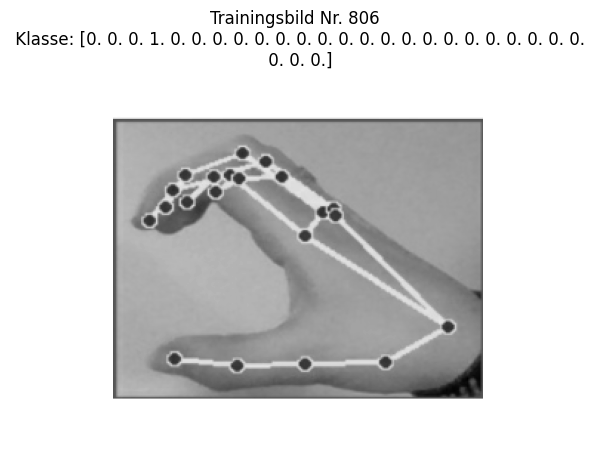

In [49]:
import random
# Darstellung eines zufällig ausgewählten Bildes
randindex = random.randint(0, 7601)
plttitle = "Trainingsbild Nr. {} \n Klasse: {}".format(randindex, train_labels[randindex])
plt.imshow(train_images[randindex].reshape(250,250), cmap='gray')
plt.title(plttitle)
plt.axis('off')
plt.show()

In [2]:
# Netzwerkarchitektur
model = Sequential()

    # Detektion
model.add(Conv2D(32, kernel_size=(5,5), activation= 'relu', input_shape= mnist_inputshape))

    # Conv_Block 2
model.add(Conv2D(64, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

    # Identifikation
model.add(Flatten())
model.add(Dense(128, activation='relu', name='features'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

NameError: name 'Sequential' is not defined

In [ ]:
# Festlegung der Verlustfunktion und Optimierung
model.compile(loss='categorial_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
# Trainig des Models
LOGDIR = "D:/logs"
tensorboard = TensorBoard(log_dir=LOGDIR, histogram_freq=0,
                             write_graph=True,
                             write_images=True)

# Hyperparameter
batch_size = 128
num_classes = 10
epochs = 12

history = model.fit(train_images, train_labels,
                    batch_size=batch_size,
                    callbacks=[tensorboard],
                    epochs=epochs,
                    verbose=1,
                    validation_data=(test_images, test_labels))

In [ ]:
# Evaluation
score = model.evaluate(test_images, test_labels)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

In [ ]:
# Speichern
model.save('Model.h5')

In [ ]:
' Laden des zu klassifizierenden Bildes'
path = ''
file = 'vogel.jpg'
img_file = os.path.join(path,file)

# Transformation in Bildgröße
img = image.load_img(img_file, target_size =(229,229))

x = image.img_to_array(img)
print(x.shape)
print(x)

In [ ]:
# zusätzliche Dimension für die Batchverarbeitung der Bilder
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print(x.shape)
print(x)

In [ ]:
# Klassifikation des Bildes
prediction = model.predict(x)

decoded = decode_predictions(prediction, top=3)[0]
print(decoded)

In [ ]:
# klassifiziertes Bild mit Klassenlegende
plt.figure(figsize=(8,8))

pos_x, pos_y = 1, 10
for id, lab, prob in decoded:
    plt.text(pos_x, pos_y, 'Klasse: {} - {:.2f}%'.format(lab, prob*100),
             fontsize=12, color='black',
             bbox=dict(boxstyle='round', pad=0.1, fc='white'))
    pos_y += 10